In [1]:
import os
import skimage as sk
import scipy.ndimage as ndi
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report, jaccard_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

COMENZAREMOS CREANDO LISTAS CON LOS ANIMALES

In [46]:
def aplanar_imagen(imagen):

    # Convertir la imagen a un array de NumPy
    array_imagen = np.array(imagen)
    
    # Asegurarse de que la imagen esté en escala de grises o RGB
    if len(array_imagen.shape) == 3:  # Imagen RGB
        # Aplana la imagen manteniendo todos los canales
        vector_aplanado = array_imagen.flatten()
    else:  # Imagen en escala de grises
        vector_aplanado = array_imagen.flatten()
    
    return vector_aplanado

In [ ]:

def dimension_imagenes(carpeta_imgs,carpeta_masks,target_size=(280,280)):

# Tamaño deseado
  # Reemplaza con el tamaño deseado, por ejemplo, (256, 256)

# Lista de imágenes (rutas o imágenes cargadas)

    resized_images = []
    resized_masks = []
    for imagen in carpeta_imgs:
        with Image.open(imagen) as img:
            resized_img = img.resize(target_size)  # Redimensiona la imagen
            resized_images.append(resized_img)  # Guarda la imagen redimensionada
    
    for mask in carpeta_masks:
        with Image.open(mask) as msk:
            resized_mask = msk.resize(target_size)  # Redimensiona la imagen
            resized_masks.append(resized_mask)

    return resized_images, resized_masks

def aplicar_mascara(image,mascara):
    masked_image = Image.composite(image, Image.new("RGBA", image.size, (0, 0, 0, 0)), mascara)
    return masked_image

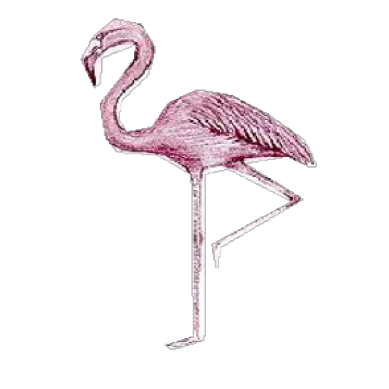

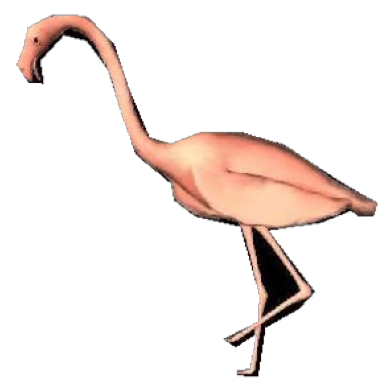

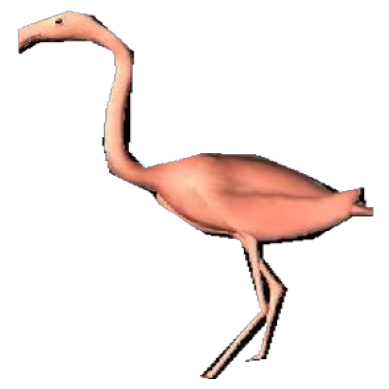

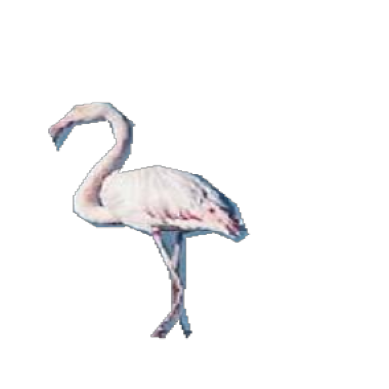

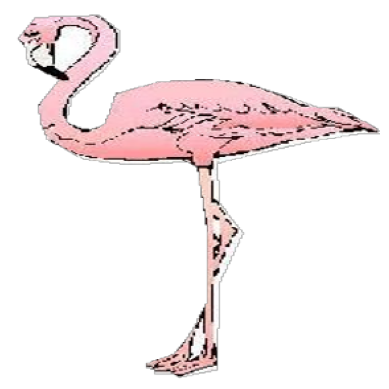

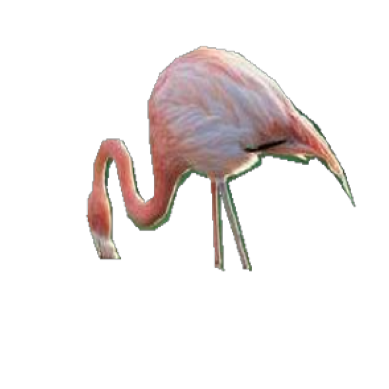

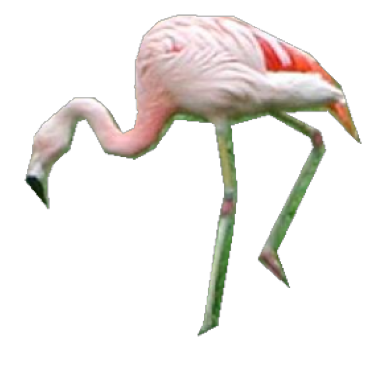

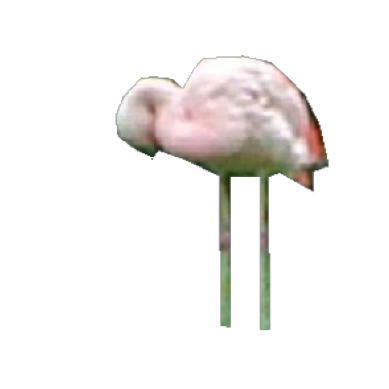

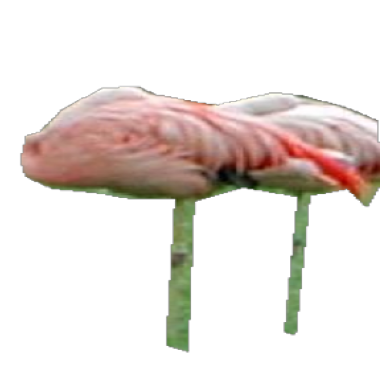

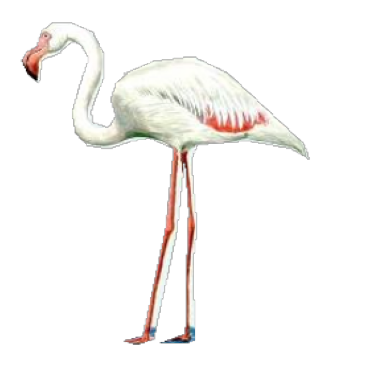

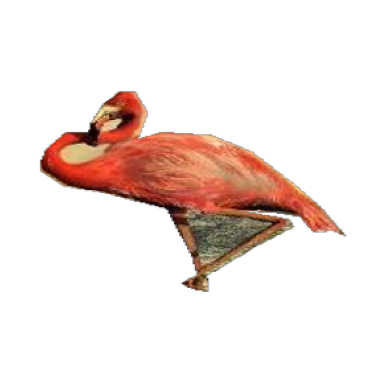

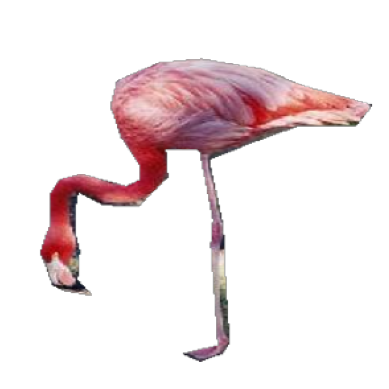

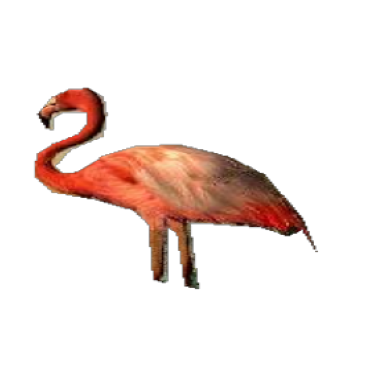

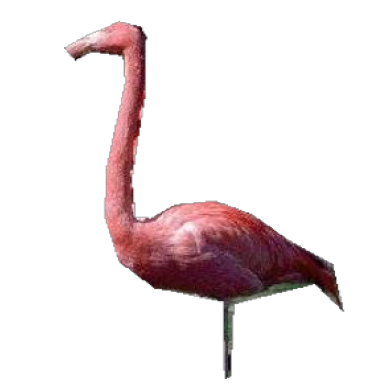

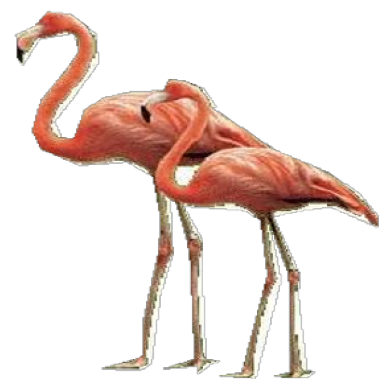

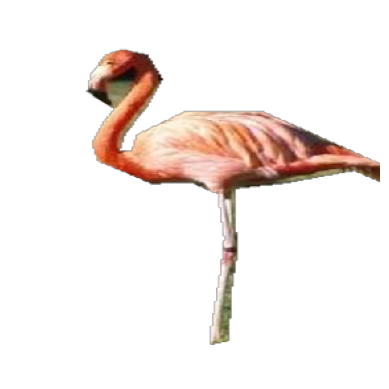

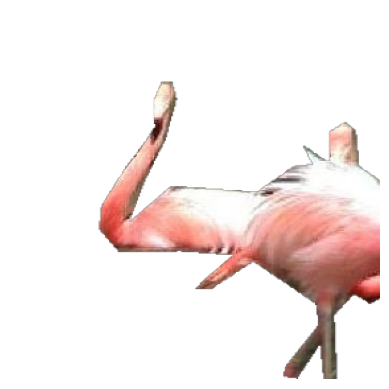

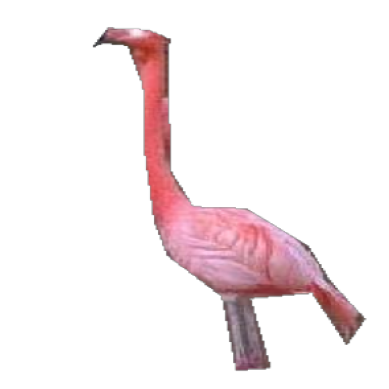

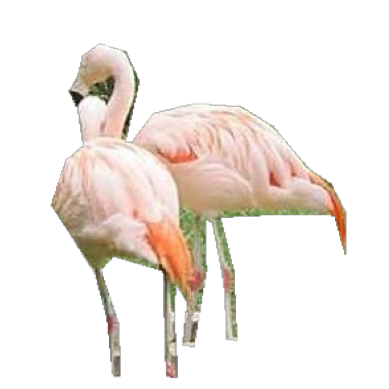

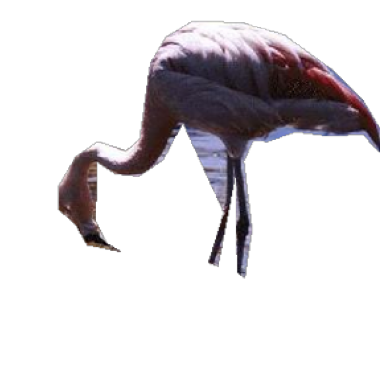

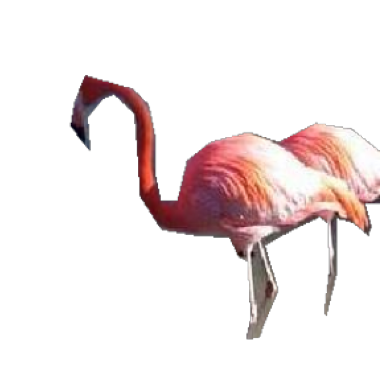

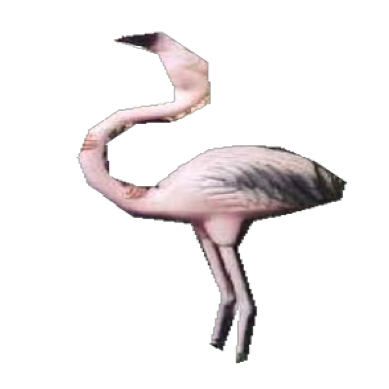

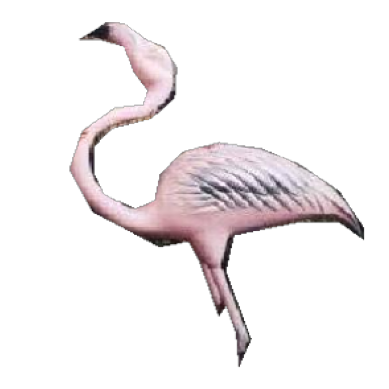

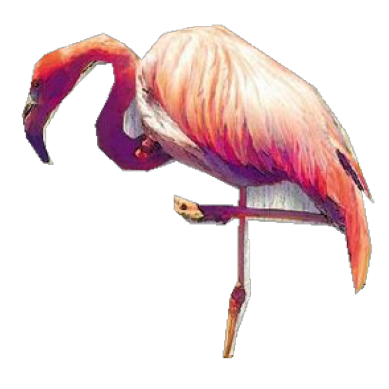

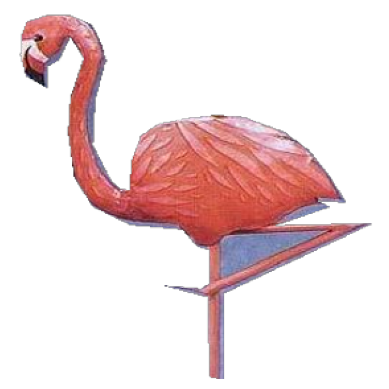

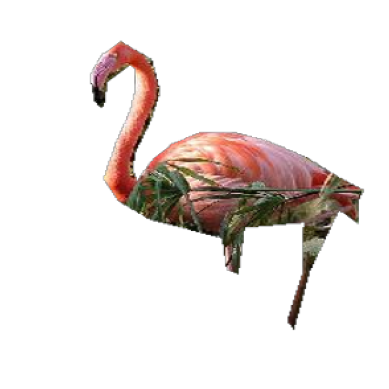

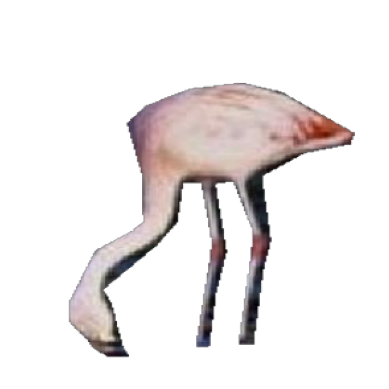

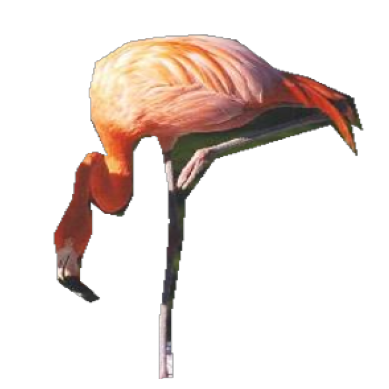

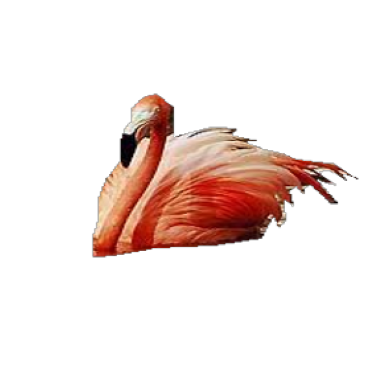

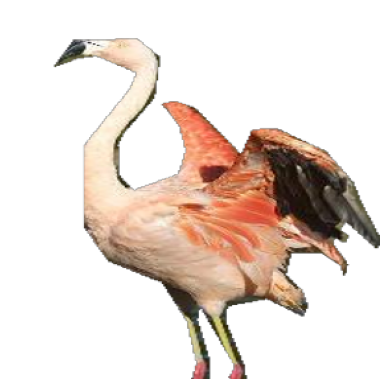

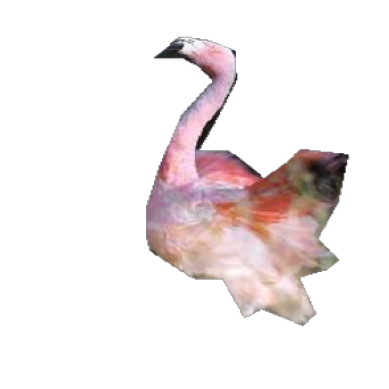

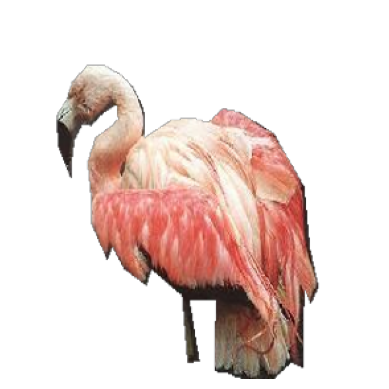

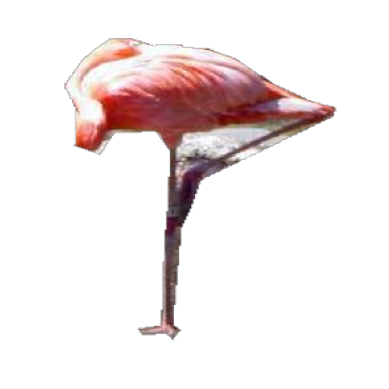

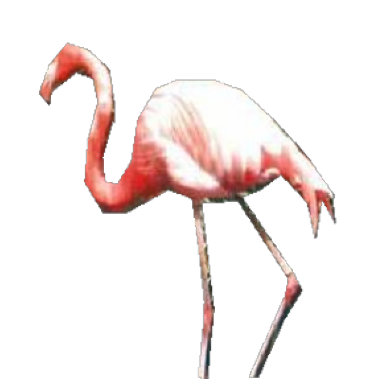

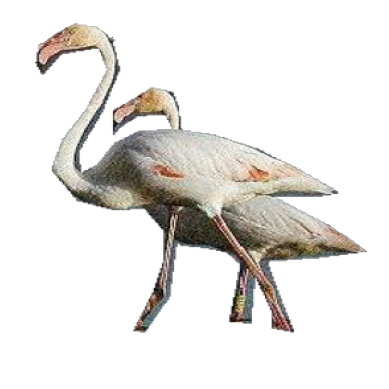

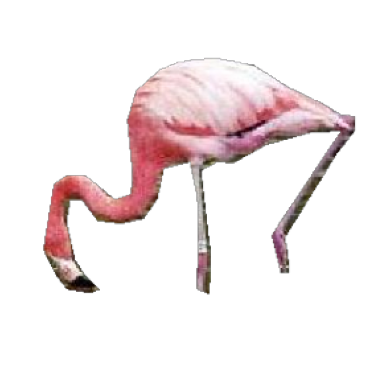

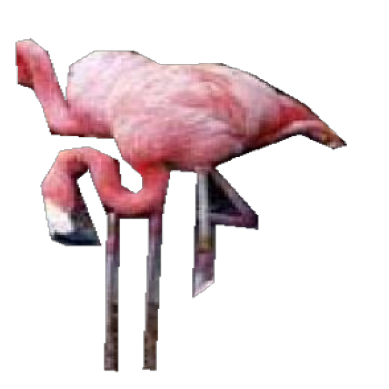

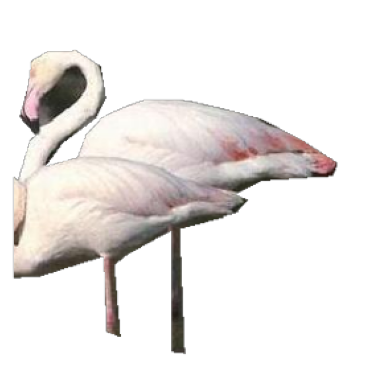

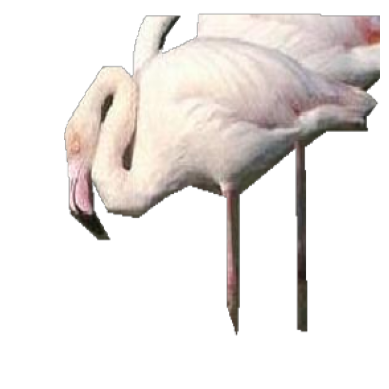

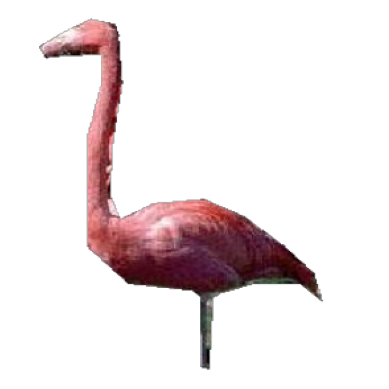

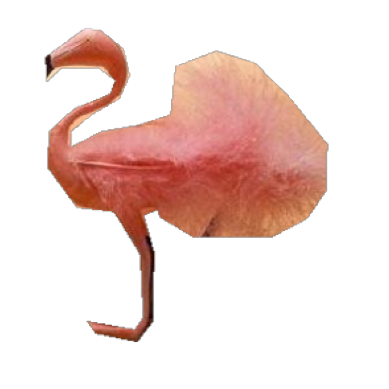

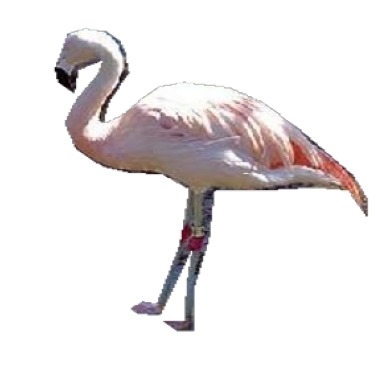

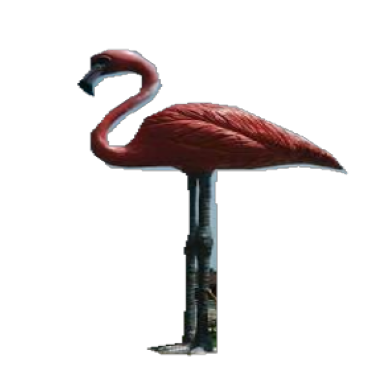

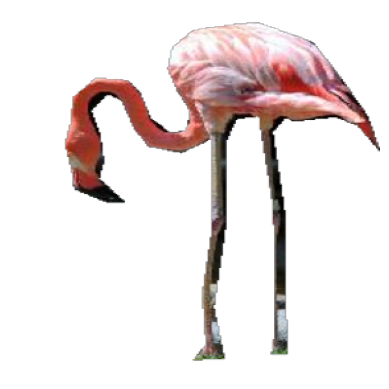

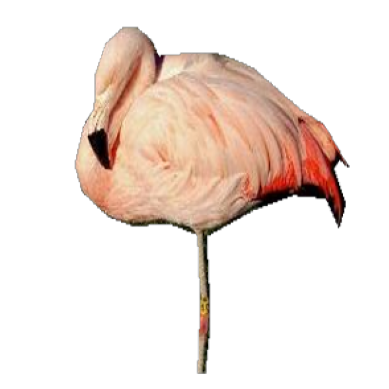

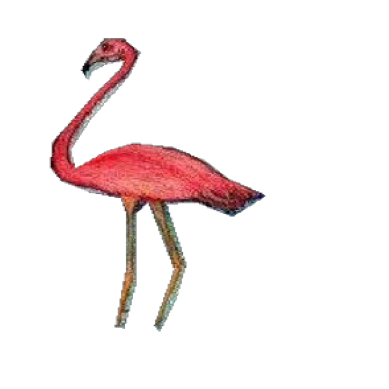

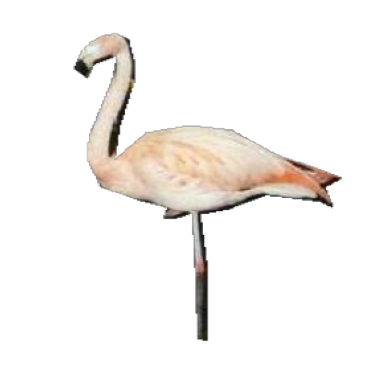

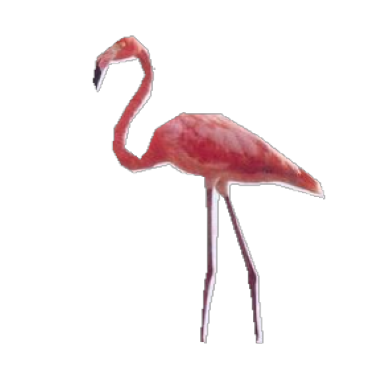

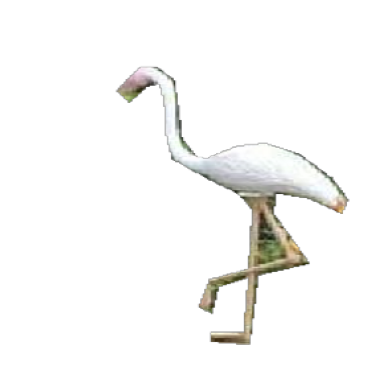

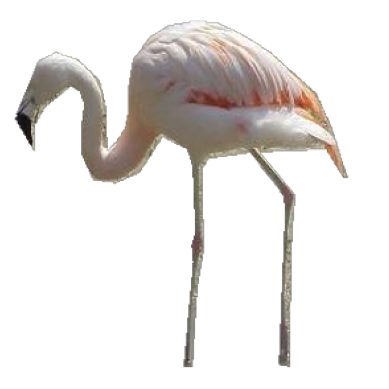

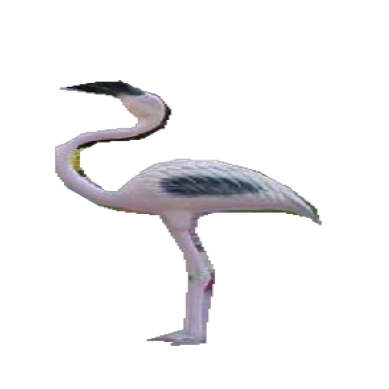

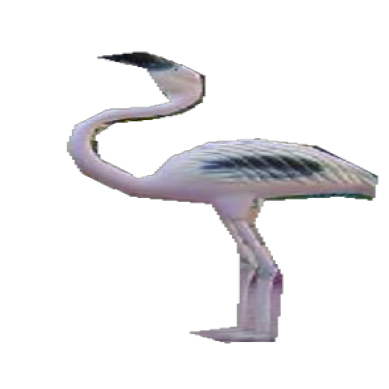

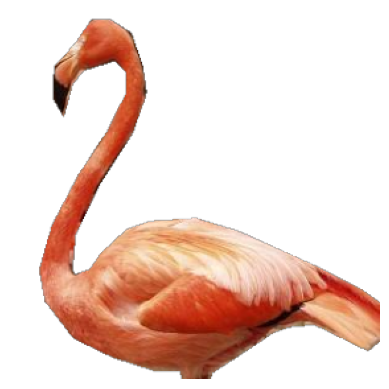

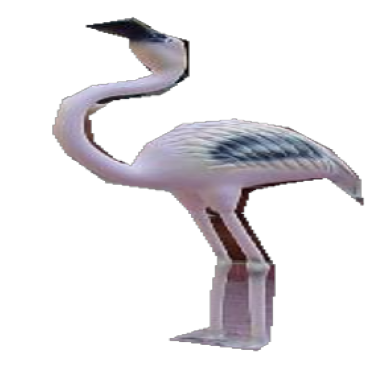

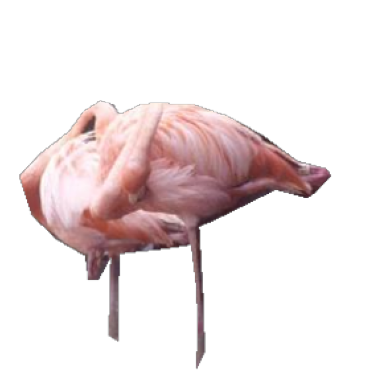

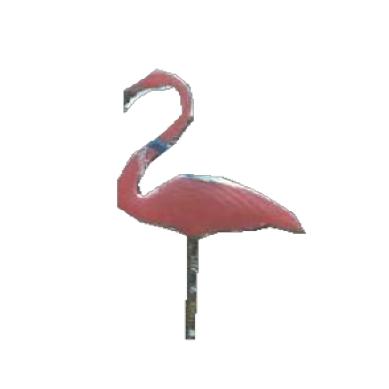

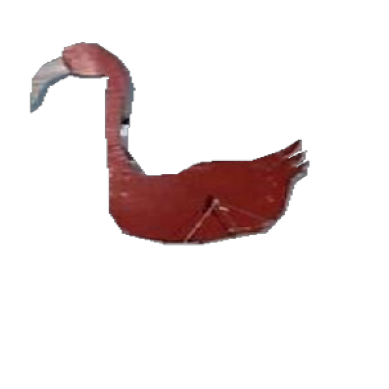

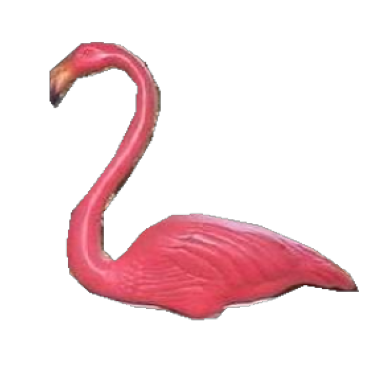

In [47]:

image_folder = 'objects/images/flamingo'
mask_folder = 'objects/masks/flamingo'

images = [os.path.join(image_folder, f) for f in os.listdir(image_folder) if f.endswith(('.png', '.jpg'))]
masks = [os.path.join(mask_folder, f) for f in os.listdir(mask_folder) if f.endswith(('.png', '.jpg'))]
vectores_aplanados = [aplanar_imagen(imagen) for imagen in images]
vectores_aplanados = [aplanar_imagen(mask) for mask in masks]

resized_images,resized_masks=dimension_imagenes(images,masks)
flamencazos=[]
for i in range(len(resized_images)):
    imagen_mascara=aplicar_mascara(resized_images[i],resized_masks[i])
    flamencazos.append(imagen_mascara)




# Asumimos que flamencazos contiene objetos de tipo Pillow.Image
for i in range(len(flamencazos)):
    first_image = flamencazos[i]  # Seleccionar el primer elemento
    plt.imshow(first_image)
    plt.axis('off')
    plt.show()

